## Z 검증

- 모집단 특징: 표준편차 5
- 검증할 귀무 가설(H0): 모집단의 평균은 90이다.
- 샘플링: 40명 
- 표본 평균: 85
- 신뢰도: 95%

In [ ]:
import math

xbar = 85
mu0 = 90
sigma = 5
n = 40

z_stat = (xbar - mu0) / (sigma/math.sqrt(n))

if z_stat < 0 :
    p_value = 2*
else:

p_value < 0.05

# T 검증

## 일표본 t-검정

In [2]:
# 평균
mu = 200
# data
data = [200,210,180,190,185,170,180,
       180,210,180,183,191,204,201,186]

#데이터가 적어도 30개 이상이면 중심극한 정리를 적용할 수 있지만
#여기서는 데이터 수가 15개 이기 때문에 별도의 정규성 검정이 필요
### 정규성 검정
from scipy.stats import shapiro
shapiro(data)


ShapiroResult(statistic=0.9217347502708435, pvalue=0.20472237467765808)

In [1]:
# 정규성 검정에서는 p-value가 유의수준 0.05보다 클 경우 표본이 정규분포를 따른다고 판단

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'box plot')

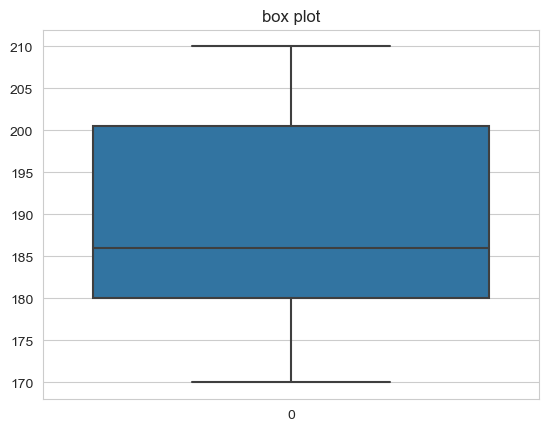

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

sns.boxplot(data=data)
plt.title('box plot')

In [4]:
from scipy.stats import ttest_1samp

ttest_1samp(data, mu)

Ttest_1sampResult(statistic=-3.1562714293709564, pvalue=0.007003780898109026)

In [5]:
#자유도 계산
df = len(data) - 1
print(df)

#평균과 신뢰구간
from numpy import array,mean
from scipy.stats import sem,t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

mean_confidence_interval(data)

14


(190.0, 183.20468237313676, 196.79531762686324)

## 대응표본 t-검정 (paired sample t-test)

In [7]:
import pandas as pd

before = [7,3,4,5,2,1,6,6,5,4]
after = [8,4,5,6,2,3,6,8,6,5]
when = ['before', 'after']
when = [when[j] for j in range(2) for i in range(10)]
data = pd.DataFrame({'when':when, 'score':before+after})
data.head(3)

,when,score
0,before,7
1,before,3
2,before,4


<AxesSubplot:xlabel='when', ylabel='score'>

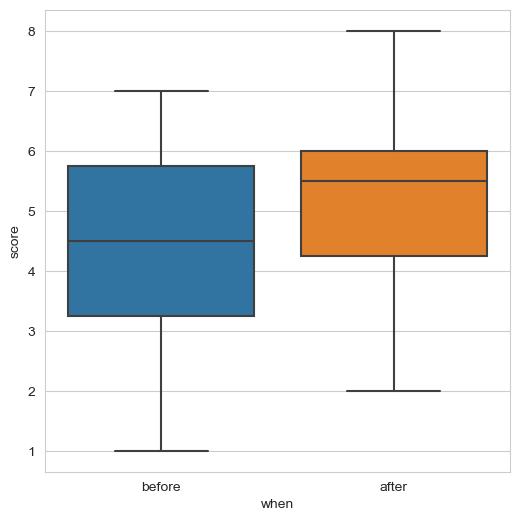

In [8]:
plt.figure(figsize=(6,6))
sns.boxplot(x='when', y='score', data=data)

In [9]:
#정규성 검정
from scipy.stats import shapiro

normal1 = shapiro(before)
normal2 = shapiro(after)
print(normal1, normal2)

#p-value모두 0.05보다 크기 때문에 정규성에 문제가 없음.

ShapiroResult(statistic=0.9644591808319092, pvalue=0.835266649723053) ShapiroResult(statistic=0.945683479309082, pvalue=0.6177965998649597)


In [10]:
# 등분산성 고려
from scipy.stats import levene
print(levene(before, after))

from scipy.stats import bartlett
print(bartlett(before, after))

#p-value가 0.05보다 커서 등분산성이 있다고 할 수 있다.

LeveneResult(statistic=0.0, pvalue=1.0)
BartlettResult(statistic=0.007785808167159078, pvalue=0.9296881301038368)


In [11]:
import scipy.stats

# 대응표본 t검정 수행
scipy.stats.ttest_rel(before,after)

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)